In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
train, test = fashion_mnist.load_data()

In [17]:
X_train, y_train = train[0][:-5000]/255.0, train[1][:-5000]
X_valid, y_valid = train[0][-5000:]/255.0, train[1][-5000:]
X_test, y_test = test[0]/255.0, test[1]

In [18]:
# build model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers

In [21]:
model_weights = model.get_weights()
len(model_weights)

6

In [22]:
model_weights[0].shape, model_weights[1].shape # weights and biases of dense layer 1

((784, 300), (300,))

In [23]:
model_weights[2].shape, model_weights[3].shape

((300, 100), (100,))

In [24]:
model_weights[4].shape, model_weights[5].shape

((100, 10), (10,))

In [25]:
# compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [26]:
# train model, default batch_size = 32
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7100 - accuracy: 0.7683 - val_loss: 0.5167 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4815 - accuracy: 0.8346 - val_loss: 0.4723 - val_accuracy: 0.8324
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4387 - accuracy: 0.8475 - val_loss: 0.4369 - val_accuracy: 0.8438
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4112 - accuracy: 0.8571 - val_loss: 0.4447 - val_accuracy: 0.8384
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3928 - accuracy: 0.8619 - val_loss: 0.3831 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3752 - accuracy: 0.8690 - val_loss: 0.3808 - val_accuracy: 0.8618
Epoch 7/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3629 - accuracy: 0.8734 - val_loss: 0.3717 - val_accuracy:

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

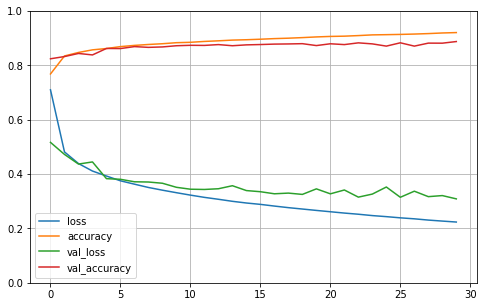

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [30]:
# model evaluation
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8832


[0.32905322313308716, 0.8831999897956848]

In [32]:
# model prediction
unknown = X_test[:3]
y_proba = model.predict(unknown)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
import numpy as np
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [38]:
unknown_labels = y_test[:3]
unknown_labels

array([9, 2, 1], dtype=uint8)

In [39]:
y_pred == unknown_labels

array([ True,  True,  True])